In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
import sys
import pandas as pd
import shap

with open("features/features_packed.csv", "r") as f:
  line = f.readline()
  feature_names = line.split(",")
  feature_names.pop(0)

packed = pd.read_csv("features/features_packed.csv")
notpacked = pd.read_csv("features/features_notpacked.csv")
X = pd.concat([packed,notpacked], ignore_index = True)
names = X.loc[:,"name"]
X = X.drop(["name"], axis = 1)
y = np.append(np.ones(len(packed)),np.zeros(len(notpacked)))


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [5]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12]}
dt = DecisionTreeClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=dt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model1 = search.best_estimator_

The best parameters are {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 9} with a score of 0.98884 in training and a score of 0.99854 in testing


In [6]:
y_pred = model1.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        print(names[test_index[i]])
        

aspack_ws.exe


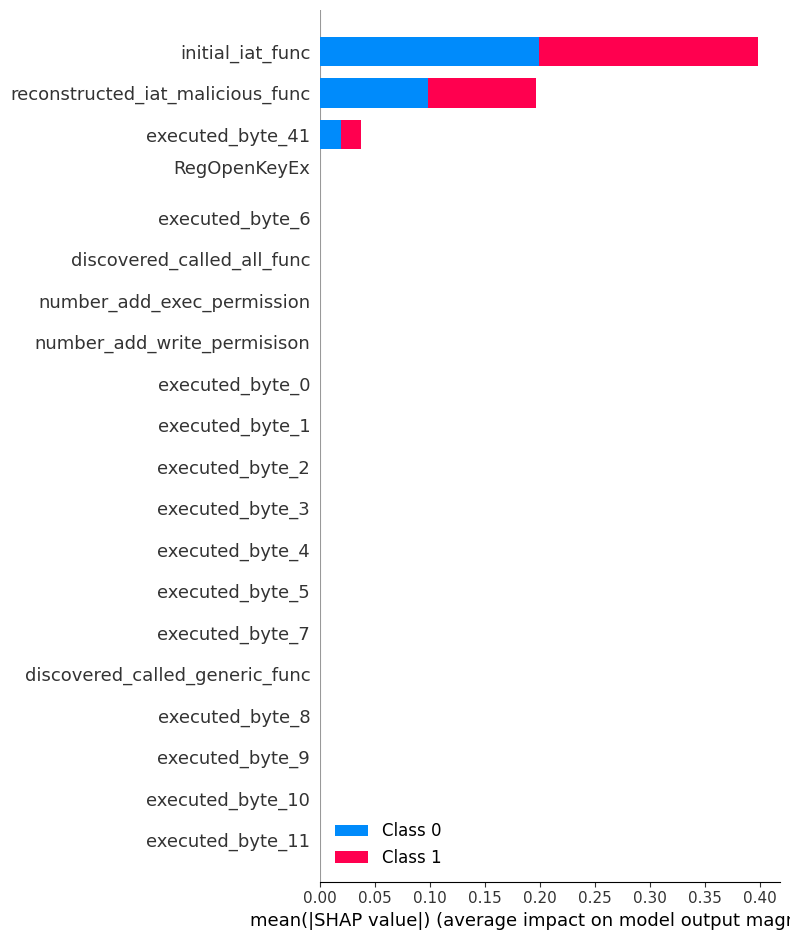

In [7]:
explainer = shap.Explainer(model1)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/clean1.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [8]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
rf = RandomForestClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model2 = search.best_estimator_

The best parameters are {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 32} with a score of 1.00000 in training and a score of 1.00000 in testing


In [9]:
y_pred = model2.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        print(names[test_index[i]])

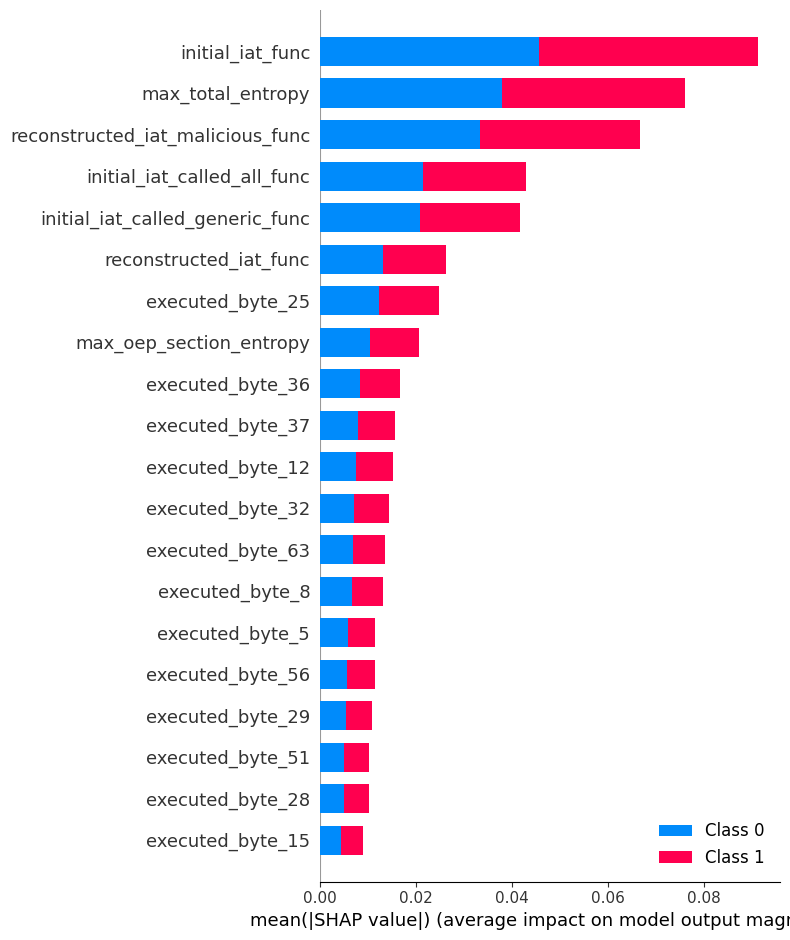

In [10]:
explainer = shap.Explainer(model2)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/clean2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [11]:
with open("features/static_features_packed.csv", "r") as f:
  line = f.readline()
  feature_names = line.split(",")
  feature_names.pop(0)

packed = pd.read_csv("features/static_features_packed.csv")
notpacked = pd.read_csv("features/static_features_notpacked.csv")
X = pd.concat([packed,notpacked], ignore_index = True)
names = X.loc[:,"name"]
X = X.drop(["name"], axis = 1)
y = np.append(np.ones(len(packed)),np.zeros(len(notpacked)))


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [12]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12]}
dt = DecisionTreeClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=dt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model3 = search.best_estimator_

The best parameters are {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2} with a score of 0.99459 in training and a score of 0.99810 in testing


In [13]:
y_pred = model3.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        print(names[test_index[i]])

checkver.exe
PEview.exe


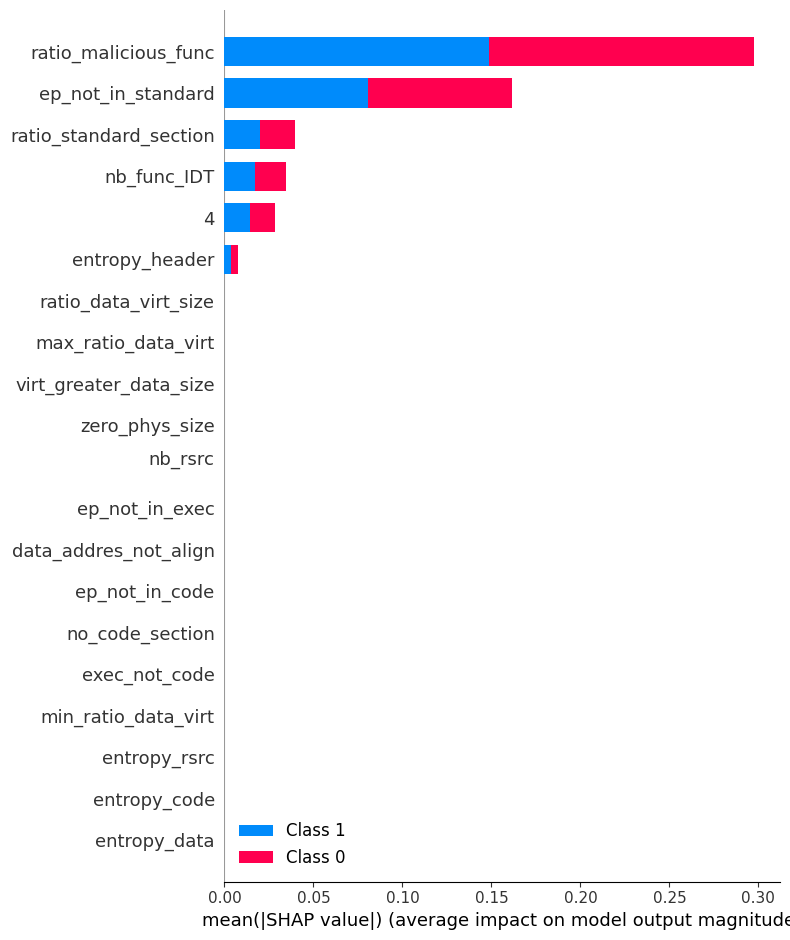

In [14]:
explainer = shap.Explainer(model3)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/clean3.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [15]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
rf = RandomForestClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model4 = search.best_estimator_

The best parameters are {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 10} with a score of 0.99649 in training and a score of 0.99810 in testing


In [16]:
y_pred = model4.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        print(names[test_index[i]])

checkver.exe
PEview.exe


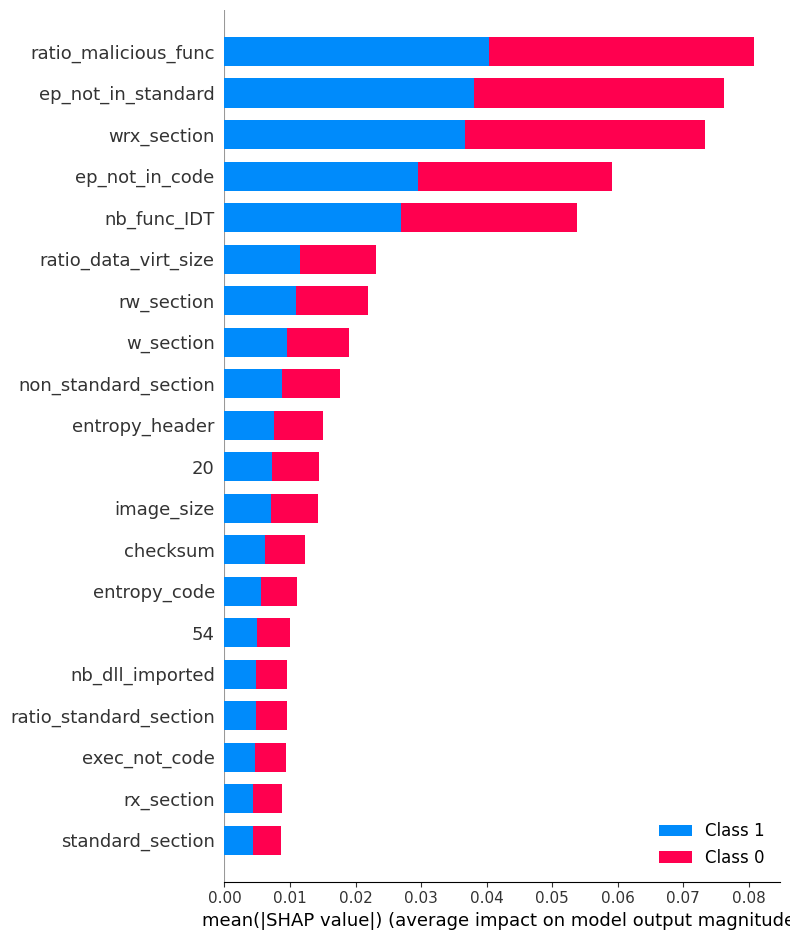

In [17]:
explainer = shap.Explainer(model4)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/clean4.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [18]:
with open("features/static_features_packed.csv", "r") as f:
  line = f.readline()
  static_feature_names = line.split(",")
  static_feature_names.pop(0)

with open("features/features_packed.csv", "r") as f:
  line = f.readline()
  feature_names = line.split(",")
  feature_names.pop(0)

feature_names = feature_names.append(static_feature_names)

packed = pd.read_csv("features/features_packed.csv")
packed_static = pd.read_csv("features/static_features_packed.csv")
packed = packed.merge(packed_static, on='name')
notpacked = pd.read_csv("features/features_notpacked.csv")
notpacked_static = pd.read_csv("features/static_features_notpacked.csv")
notpacked = notpacked.merge(notpacked_static, on='name')

X = pd.concat([packed,notpacked], ignore_index = True)
names = X.loc[:,"name"]
X = X.drop(["name"], axis = 1)
y = np.append(np.ones(len(packed)),np.zeros(len(notpacked)))

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [19]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12]}
dt = DecisionTreeClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=dt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model5 = search.best_estimator_

The best parameters are {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3} with a score of 0.99375 in training and a score of 1.00000 in testing


In [20]:
y_pred = model5.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        print(names[test_index[i]])

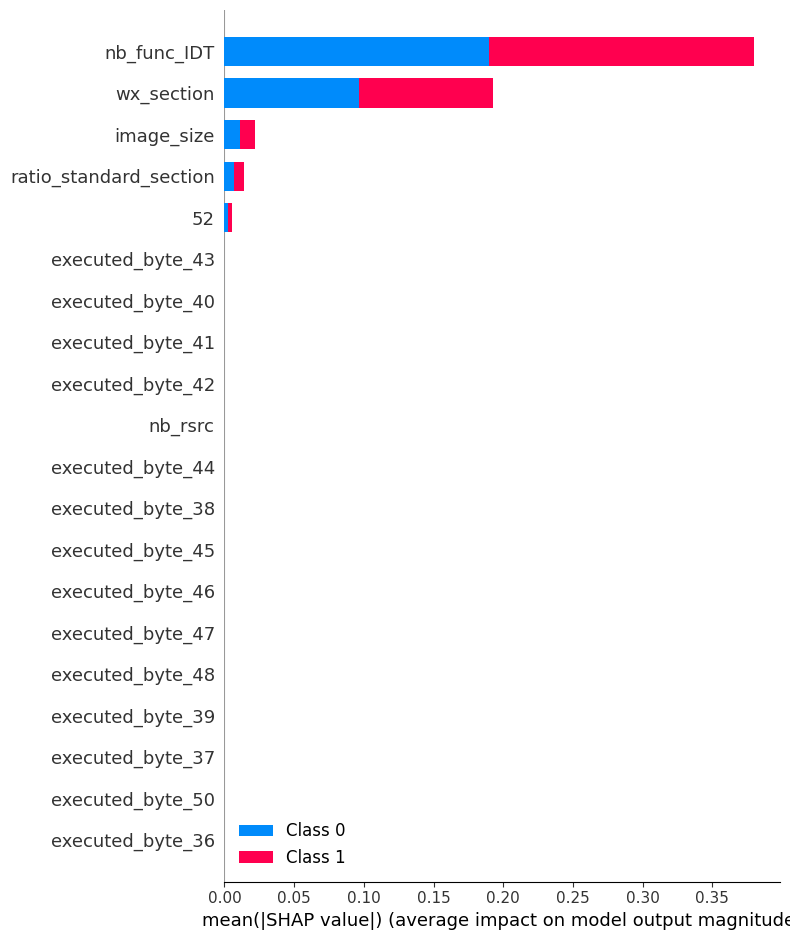

In [21]:
explainer = shap.Explainer(model5)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/clean5.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [22]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
rf = RandomForestClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model6 = search.best_estimator_

The best parameters are {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 24} with a score of 1.00000 in training and a score of 0.99848 in testing


In [23]:
y_pred = model6.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        print(names[test_index[i]])

md5summer.exe


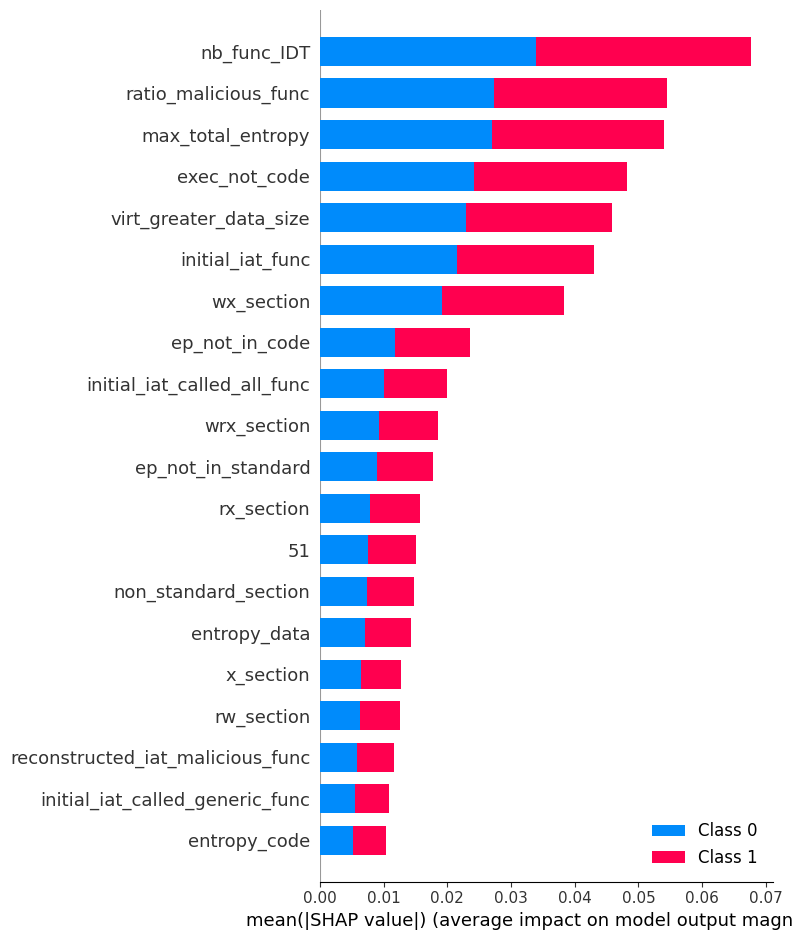

In [24]:
explainer = shap.Explainer(model6)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/clean6.pdf", format="pdf", bbox_inches="tight")
plt.show()